In [1]:
import pandas as pd
import numpy as np
import os
os.getcwd()

'C:\\Users\\Rajshah'

In [2]:
import glob

In [3]:
os.chdir('C:\\Users\\cell_images')

In [4]:
os.getcwd()

'C:\\Users\\cell_images'

In [5]:
base_dir = ase_dir = os.path.join('./cell_images')
infected_dir= os.path.join(base_dir, 'Parasitized')
uninfected_dir = os.path.join(base_dir,'Uninfected')


parasitized = glob.glob(infected_dir+'/*.png')
uninfected =glob.glob(uninfected_dir+'/*.png')
len(parasitized), len(uninfected)

(13779, 13779)

In [6]:
print(parasitized[:1])

['./cell_images\\Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png']


In [8]:
import cv2

In [9]:
print('Total number of Infected Cell Images are ',len(parasitized),' shape of first image is ',cv2.imread(parasitized[0]).shape)
print('Total number of Uninfected Cell Images are ',len(uninfected),' shape of the first image is ',cv2.imread(uninfected[0]).shape)

Total number of Infected Cell Images are  13779  shape of first image is  (148, 142, 3)
Total number of Uninfected Cell Images are  13779  shape of the first image is  (139, 160, 3)


In [11]:
import matplotlib.pyplot as plt

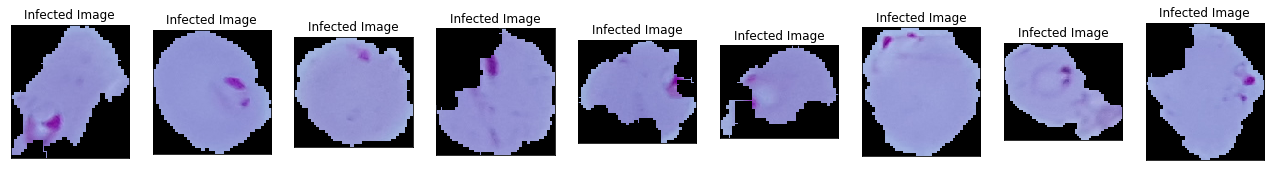

In [12]:
plt.figure(figsize=(25,20))
for i in range(1,10):
    plt.subplot(1,10,i)
    value = np.random.randint(100)
    image = cv2.imread(parasitized[value])
    plt.imshow(image)
    plt.title('Infected Image')
    plt.xticks([])
    plt.yticks([])

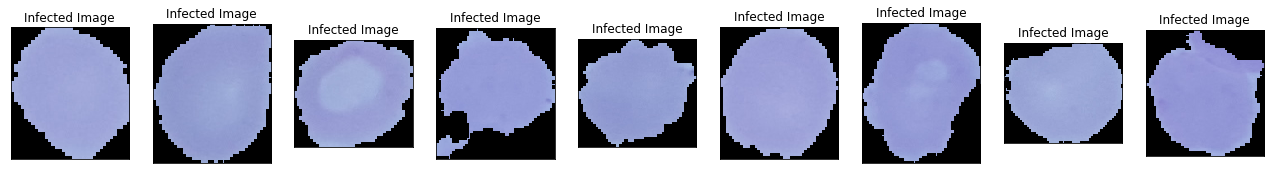

In [13]:
plt.figure(figsize=(25,20))
for i in range(1,10):
    plt.subplot(1,10,i)
    value = np.random.randint(100)
    image = cv2.imread(uninfected[value])
    plt.imshow(image)
    plt.title('Infected Image')
    plt.xticks([])
    plt.yticks([])

In [14]:
path1 = os.path.join(base_dir + '/' + 'Parasitized')

In [15]:
images = []
labels = []

for i in glob.glob(os.path.join(path1,'*png')):
    img = cv2.imread(i)
    img = cv2.resize(img,(125,125))  
    images.append(np.array(img))
    labels.append(0)

In [16]:
path2 = os.path.join(base_dir + '/' + 'Uninfected')

In [17]:
for j in glob.glob(os.path.join(path2,'*png')):
    img = cv2.imread(j)
    img = cv2.resize(img,(125,125)) 
    images.append(np.array(img))
    labels.append(1)  

In [18]:
cells , labels = np.array(images), np.array(labels)

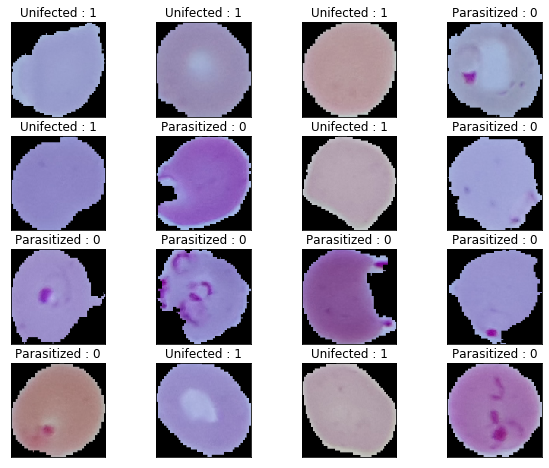

In [19]:
fig=plt.figure(figsize=(10, 8))
n = 16
for i in range(n):
    img = np.random.randint(0, cells.shape[0] , 1)
    fig.add_subplot(n**(.5), n**(.5), i+1)
    plt.imshow(cells[img[0]])
    plt.title('{} : {}'.format('Unifected' if labels[img[0]] == 1 else 'Parasitized' ,
                                labels[img[0]]) )
    plt.xticks([]) , plt.yticks([])
        
plt.show()

In [21]:
import random
random_seed=50

In [23]:
import keras
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(cells, labels, test_size=0.3)

In [ ]:
X_train = X_train.astype('float32')/255

In [25]:
X_test = X_test.astype('float32')/255

In [26]:
num_classes=len(np.unique(labels))

In [27]:
Y_train=keras.utils.to_categorical(Y_train,num_classes)

In [28]:
Y_test=keras.utils.to_categorical(Y_test,num_classes)

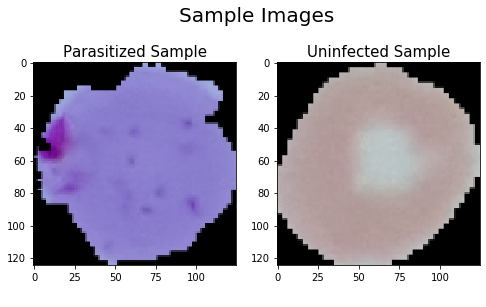

In [29]:
np.random.seed(random_seed)
rand=np.random.randint(cells.shape[3])
parasitized_sample=X_train[rand]
np.random.seed(random_seed)
rand=np.random.randint(cells.shape[0])
uninfected_sample=X_train[rand]

fig=plt.figure(figsize=(8,5))
plt.title("Sample Images",fontsize=20)
plt.axis('off')
ax1=fig.add_subplot(121)
ax1.imshow(parasitized_sample)
ax1.set_title("Parasitized Sample",fontsize=15)
ax2=fig.add_subplot(122)
ax2.imshow(uninfected_sample)
ax2.set_title("Uninfected Sample",fontsize=15)
plt.show()

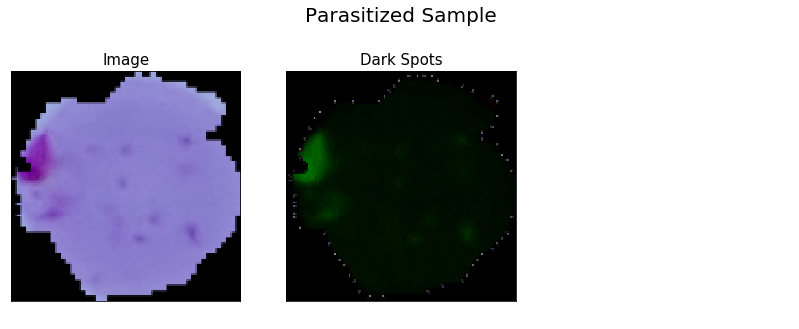

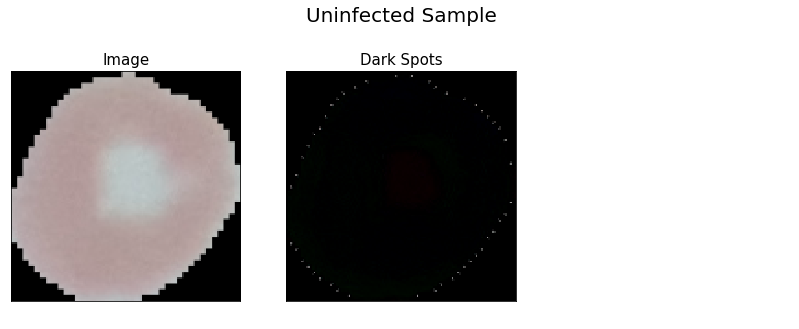

In [30]:
import skimage.morphology as skm
def dark_spots(sample,title='',to_return=False):
    black_tophat=skm.black_tophat(sample)
    black_tophat_refined=skm.black_tophat(black_tophat)
    black_tophat_refined=skm.black_tophat(black_tophat_refined)
    if(to_return==True):
        return black_tophat_refined
    
    fig=plt.figure(figsize=(14,5))
    plt.title(title+'\n',fontsize=20)
    plt.axis('off')
    ax1=fig.add_subplot(131)
    ax1.imshow(sample)
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    ax1.set_title("Image",fontsize=15)
    ax2=fig.add_subplot(132)
    ax2.imshow(black_tophat)
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)
    ax2.set_title("Dark Spots",fontsize=15)
dark_spots(parasitized_sample,"Parasitized Sample")
dark_spots(uninfected_sample,"Uninfected Sample")

In [36]:
X_pixels_train = X_train.flatten().reshape((19290, 46875))
print(X_pixels_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [37]:
print(X_pixels_train.shape)

(19290, 46875)


In [38]:
X_pixels_test = X_test.flatten().reshape((8268, 46875))
print(X_pixels_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [39]:
print(X_pixels_test.shape)

(8268, 46875)


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [43]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_pixels_train, Y_train)
pred = rf.predict(X_pixels_test)

In [45]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4074
           1       0.51      1.00      0.67      4194

   micro avg       0.51      0.51      0.51      8268
   macro avg       0.25      0.50      0.34      8268
weighted avg       0.26      0.51      0.34      8268
 samples avg       0.51      0.51      0.51      8268



C:\Users\Rajshah\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
from keras.preprocessing.image import ImageDataGenerator

In [33]:
augmentor = ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.2,horizontal_flip=True,validation_split=0.3)

In [34]:
train_data = augmentor.flow_from_directory(base_dir,batch_size=64,
                                                target_size = (96,96),class_mode = 'binary',subset = 'training')
test_data = augmentor.flow_from_directory(base_dir,batch_size=64,target_size=(96,96),
                                              class_mode='binary',subset='validation')

Found 19292 images belonging to 2 classes.
Found 8266 images belonging to 2 classes.


In [35]:
print(train_data)

In [31]:
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Dropout,Dense,Flatten,BatchNormalization,Conv2D
from keras.callbacks import ModelCheckpoint

In [70]:
model1 = Sequential()

model1.add(Conv2D(filters=16,kernel_size=5,padding="same",activation="tanh",input_shape=(96,96,3)))
model1.add(MaxPooling2D(pool_size=3))

model1.add(Conv2D(filters=32,kernel_size=5,padding="same",activation="tanh"))
model1.add(MaxPooling2D(pool_size=3))

model1.add(Conv2D(filters=64,kernel_size=5,padding="same",activation="tanh"))
model1.add(MaxPooling2D(pool_size=3))

model1.add(Conv2D(filters=128,kernel_size=5,padding="same",activation="tanh"))
model1.add(MaxPooling2D(pool_size=3))

model1.add(Dropout(0.2))
model1.add(Flatten())

model1.add(Dense(500,activation="relu"))
model1.add(Dropout(0.2))

model1.add(Dense(1,activation="sigmoid"))
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 96, 96, 16)        1216      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        12832     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 128)        

In [72]:
history1 = model1.fit_generator(train_data,steps_per_epoch=3000,
                              epochs = 3,validation_data=test_data,validation_steps=64)

Epoch 1/3
3000/3000 [==============================] - 2174s 725ms/step - loss: 0.1588 - accuracy: 0.9443 - val_loss: 0.1589 - val_accuracy: 0.9607
Epoch 2/3
3000/3000 [==============================] - 1884s 628ms/step - loss: 0.1152 - accuracy: 0.9615 - val_loss: 0.0679 - val_accuracy: 0.9634
Epoch 3/3
3000/3000 [==============================] - 2198s 733ms/step - loss: 0.1026 - accuracy: 0.9647 - val_loss: 0.3751 - val_accuracy: 0.9498


In [74]:
values  = history1.history
validation_loss = values['val_loss']
validation_acc = values['val_accuracy']
training_acc = values['accuracy']
training_loss = values['loss']
epochs = range(3)

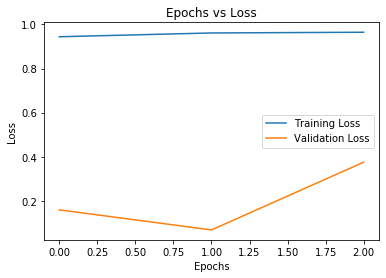

In [75]:
plt.plot(epochs,training_loss,label = 'Training Loss')
plt.plot(epochs,validation_loss,label = 'Validation Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

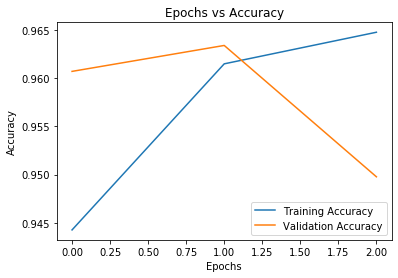

In [76]:
plt.plot(epochs,training_acc,label = 'Training Accuracy')
plt.plot(epochs,validation_acc,label = 'Validation Accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [50]:
model2 = Sequential()

model2.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(96,96,3)))
model2.add(MaxPooling2D(pool_size=2))

model2.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model2.add(MaxPooling2D(pool_size=2))

model2.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model2.add(MaxPooling2D(pool_size=2))

model2.add(Conv2D(filters=128,kernel_size=2,padding="same",activation="relu"))
model2.add(MaxPooling2D(pool_size=2))

model2.add(Dropout(0.2))
model2.add(Flatten())

model2.add(Dense(500,activation="relu"))
model2.add(Dropout(0.2))

model2.add(Dense(1,activation="sigmoid"))
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)      

In [53]:
history2 = model2.fit_generator(train_data,steps_per_epoch=3000,
                              epochs = 3,validation_data=test_data,validation_steps=64)

Epoch 1/3
3000/3000 [==============================] - 2088s 696ms/step - loss: 0.1623 - accuracy: 0.9417 - val_loss: 0.1335 - val_accuracy: 0.9551
Epoch 2/3
3000/3000 [==============================] - 1627s 542ms/step - loss: 0.1118 - accuracy: 0.9622 - val_loss: 0.1052 - val_accuracy: 0.9595
Epoch 3/3
3000/3000 [==============================] - 10306s 3s/step - loss: 0.0988 - accuracy: 0.9659 - val_loss: 0.0374 - val_accuracy: 0.9532


In [54]:
values  = history2.history
validation_loss = values['val_loss']
validation_acc = values['val_accuracy']
training_acc = values['accuracy']
training_loss = values['loss']
epochs = range(3)

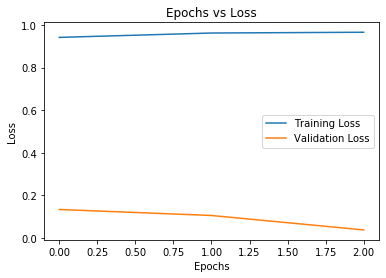

In [55]:
plt.plot(epochs,training_loss,label = 'Training Loss')
plt.plot(epochs,validation_loss,label = 'Validation Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

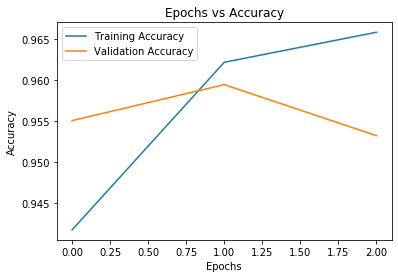

In [56]:
plt.plot(epochs,training_acc,label = 'Training Accuracy')
plt.plot(epochs,validation_acc,label = 'Validation Accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()